In [1]:
import pandas as pd

In [2]:
# Read Data
sain_df = pd.read_json('sainsburys.json')
sain_df.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,matching_rules,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities,scopes
0,2020-12-02 21:25:42,1334247396054798336,1334247396054798336,RT @felixprojectuk: Today we collected some fo...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],{'created_at': 'Wed Dec 02 13:30:07 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN
1,2020-03-25 08:55:11,1242736777103839237,1242736777103839237,@ocado @tesco @sainsburys @asda @waitrose @Mor...,None,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,2.015550e+07,...,[{'tag': None}],None,NaN,NaN,None,None,{'full_text': '@ocado @tesco @sainsburys @asda...,None,None,NaN
2,2020-03-15 18:07:30,1239251894293409797,1239251894293409797,RT @Danwhite1972: Dear panic buyers\n\nPlease ...,None,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,NaN,NaN,...,[{'tag': None}],{'created_at': 'Sun Mar 15 08:55:18 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN
3,2020-10-18 10:43:27,1317778311729369088,1317778311729369088,@daisy_haggard @sainsburys Can’t wait to see w...,"[27, 79]","<a href=""http://twitter.com/download/iphone"" r...",False,1.317512e+18,1.317512e+18,2.875019e+09,...,[{'tag': None}],None,NaN,NaN,None,None,None,None,None,NaN
4,2020-11-07 20:52:20,1325179302384717824,1325179302384717824,@lordrix @sainsburys But Sainsbury's have made...,"[21, 140]","<a href=""http://twitter.com/download/android"" ...",True,1.325169e+18,1.325169e+18,5.496380e+07,...,[{'tag': None}],None,NaN,NaN,None,None,"{'full_text': ""@lordrix @sainsburys But Sainsb...",None,None,NaN


In [3]:
#Print the basic information of the dataset
print ('The length of the dataset is %s'%len(sain_df))
print ('The begining date of the dataset is %s'%(str(min(sain_df['created_at']))))
print ('The ending date of the dataset is %s'%(str(max(sain_df['created_at']))))
print ("There are %s columns in this dataset"%(len(sain_df.columns.values)))
sain_df.columns.values

The length of the dataset is 82821
The begining date of the dataset is 2020-01-01 00:56:48
The ending date of the dataset is 2020-12-30 23:53:21
There are 37 columns in this dataset


array(['created_at', 'id', 'id_str', 'text', 'display_text_range',
       'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_tweet', 'possibly_sensitive', 'extended_entities',
       'scopes'], dtype=object)

In [4]:
# Create a new column about date
sain_df['date'] = sain_df['created_at'].dt.date
sain_df['date'] = pd.to_datetime(sain_df['date'])

In [5]:
#order by date
sain_df = sain_df.sort_values(by='date')

In [6]:
sain_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'matching_rules', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'extended_tweet', 'possibly_sensitive',
       'extended_entities', 'scopes', 'date'],
      dtype='object')

In [7]:
sain_df.shape

(82821, 38)

# Get full tweet text 

In [8]:
sain_df['extended_tweet'].head()

9738     {'full_text': '@sainsburys order placed on 14 ...
64647                                                 None
79476                                                 None
61178    {'full_text': '@sainsburys It was marsh mills ...
15750    {'full_text': "Loving the new label for the @s...
Name: extended_tweet, dtype: object

In [9]:
# transform str to dictionary and get  full_text
import ast

def get_full_text(x):
    if isinstance(x, str):
        try:
            x = ast.literal_eval(x)
            if isinstance(x, dict):
                return x.get('full_text')
        except (ValueError, SyntaxError):
            pass
    elif isinstance(x, dict):
        return x.get('full_text')
    return None

sain_df['full_text'] = sain_df['extended_tweet'].apply(get_full_text)

sain_df['full_text'].head()


9738     @sainsburys order placed on 14 Dec was delayed...
64647                                                 None
79476                                                 None
61178    @sainsburys It was marsh mills in plymouth pro...
15750    Loving the new label for the @sainsburys Taste...
Name: full_text, dtype: object

In [10]:
# Create a new column with all texts
sain_df['full_text'] = [y if x==None else x for x,y in zip(sain_df['full_text'],sain_df['text'])]

# Text Preprocessing&sentiment analysis

In [11]:
# remove duplicates
sain_df.drop_duplicates(subset=['full_text'], inplace=True)

In [12]:
#remove null value
sain_df.dropna(subset=['full_text'], inplace=True)

In [13]:
# the shape of the dataset
sain_df.shape

(66229, 39)

In [14]:
import re
import numpy as np
import seaborn as sns
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt


In [15]:
# Cleaning and removing the above stop words list from the tweet text
sain_df['pro_text'] = sain_df['full_text']

sain_df['pro_text'] = sain_df['pro_text'].str.lower()

In [16]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)    
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt  
# remove twitter handles (@user)
sain_df['pro_text'] = np.vectorize(remove_pattern)(sain_df['pro_text'], "@[\w]*")

In [17]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["all", "due", "to", "on", "daily",'get','you','they','we','it','i','rt','amp']
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

sain_df['pro_text'] = sain_df['pro_text'].apply(lambda text: cleaning_stopwords(text))
sain_df['pro_text'].head()

9738     order placed 14 dec delayed &amp; subsequently...
64647                                     couldn’t find 😢😢
79476    pleased started stocking #burrata - king soft ...
61178    marsh mills plymouth probably 1 2pm sunday gon...
15750    loving new label taste difference fino . colou...
Name: pro_text, dtype: object

In [18]:
# Remove URLs
def remove_URLs(data):
    data = re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
    return ' '.join(data.split())

sain_df['pro_text'] = sain_df['pro_text'].apply(lambda x: remove_URLs(x))
sain_df['pro_text'].head()

9738     order placed 14 dec delayed &amp; subsequently...
64647                                     couldn’t find 😢😢
79476    pleased started stocking #burrata - king soft ...
61178    marsh mills plymouth probably 1 2pm sunday gon...
15750    loving new label taste difference fino . colou...
Name: pro_text, dtype: object

In [19]:
# Remove numbers
def remove_numbers(data):
    data = re.sub('[0-9]+', '', data)
    return ' '.join(data.split())

sain_df['pro_text'] = sain_df['pro_text'].apply(lambda x: remove_numbers(x))
sain_df['pro_text'].head()

9738     order placed dec delayed &amp; subsequently “l...
64647                                     couldn’t find 😢😢
79476    pleased started stocking #burrata - king soft ...
61178    marsh mills plymouth probably pm sunday gone. ...
15750    loving new label taste difference fino . colou...
Name: pro_text, dtype: object

In [20]:
from textblob import TextBlob

# getting a new column about sentiment analysis
sentiment_results = []

for comment in sain_df['pro_text']:
    
    blob = TextBlob(comment)
    # getting sentiment polarity
    sentiment_polarity = blob.sentiment.polarity
    # result
    if sentiment_polarity > 0:
        sentiment_results.append("positive")
    elif sentiment_polarity < 0:
        sentiment_results.append("negative")
    else:
        sentiment_results.append("neutral")

# new column
sain_df['sentiment'] = sentiment_results

sain_df[['pro_text','sentiment']].head()



,pro_text,sentiment
9738,order placed dec delayed &amp; subsequently “l...,negative
64647,couldn’t find 😢😢,neutral
79476,pleased started stocking #burrata - king soft ...,positive
61178,marsh mills plymouth probably pm sunday gone. ...,negative
15750,loving new label taste difference fino . colou...,positive


In [21]:
sain_df['sentiment'].value_counts()

sentiment
positive    25929
neutral     24206
negative    16094
Name: count, dtype: int64

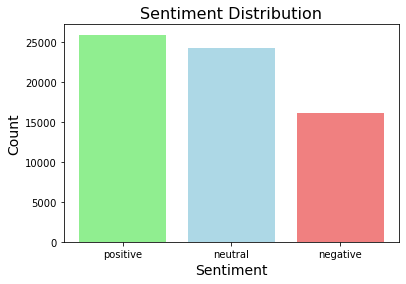

In [22]:
# getting sentiment counts
sentiment_counts = sain_df['sentiment'].value_counts()


colors = {'positive': 'lightgreen', 'negative': 'lightcoral', 'neutral': 'lightblue'}
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors.get(x, 'black') for x in sentiment_counts.index])
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sentiment Distribution', fontsize=16)
plt.show()


In [23]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&#+*=!-\"'/“/’/”\[\]]"," ",data)
sain_df['pro_text']= sain_df['pro_text'].apply(lambda x: remove_punctuations(x))
sain_df['pro_text'].head()

9738     order placed dec delayed  amp  subsequently  l...
64647                                     couldn t find 😢😢
79476    pleased started stocking  burrata - king soft ...
61178    marsh mills plymouth probably pm sunday gone  ...
15750    loving new label taste difference fino   colou...
Name: pro_text, dtype: object

In [24]:
# remove words lenth <=3
sain_df['pro_text'] = sain_df['pro_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [25]:
sain_df['pro_text'].head()

9738     order placed delayed subsequently lost transit...
64647                                          couldn find
79476    pleased started stocking burrata king soft mil...
61178    marsh mills plymouth probably sunday gone find...
15750    loving label taste difference fino colourful d...
Name: pro_text, dtype: object

In [26]:
#lemmatization

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun if POS tag is not found


def process_text(text):
    # tokenizing 
    words = word_tokenize(text)

    # words' tag
    word_pos = pos_tag(words)

    # lemmatizing
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in word_pos]

    # getting stop words list
    stop_words = set(stopwords.words('english'))

    extended_stop_words = ['amp', 'shop', 'store']  # Add more as needed
    stop_words.update(extended_stop_words)

    #  delete stop words
    lemmatized_words = [word for word in lemmatized_words if word.lower() not in stop_words]

    # Reassemble the lemmatized  word into a string
    lemmatized_text = " ".join(lemmatized_words)

    return lemmatized_text


sain_df['pro_text'] = sain_df['pro_text'].apply(process_text)


In [27]:
sain_df['pro_text'].head()

9738     order place delay subsequently lose transit le...
64647                                                 find
79476    pleased start stock burrata king soft milky ch...
61178    marsh mill plymouth probably sunday go find ba...
15750    love label taste difference fino colourful des...
Name: pro_text, dtype: object

# Wordcloud Analysis

In [28]:
words = nltk.word_tokenize(" ".join(sain_df['pro_text']))
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

In [29]:
from collections import Counter
word_counts = Counter(words)

total_words = sum(word_counts.values())


normalized_negword_counts = {word: count / total_words for word, count in word_counts.items()}


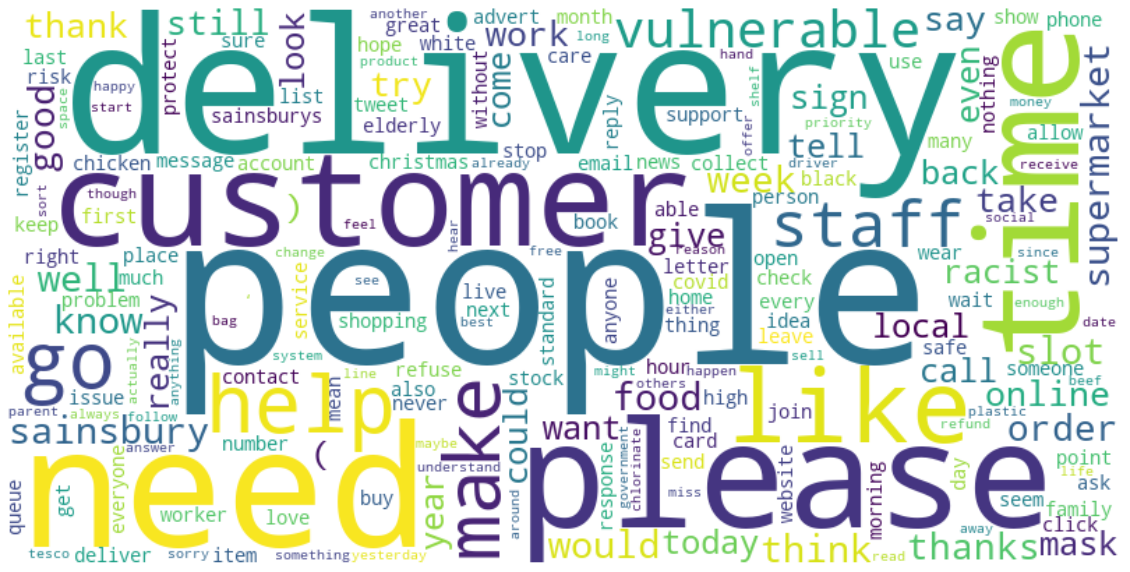

In [30]:
# get the overall word cloud map 
plt.figure(figsize = (20,20)) 

wordcloud = WordCloud(font_path=None, width=800, height=400, background_color='white').generate_from_frequencies(normalized_negword_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


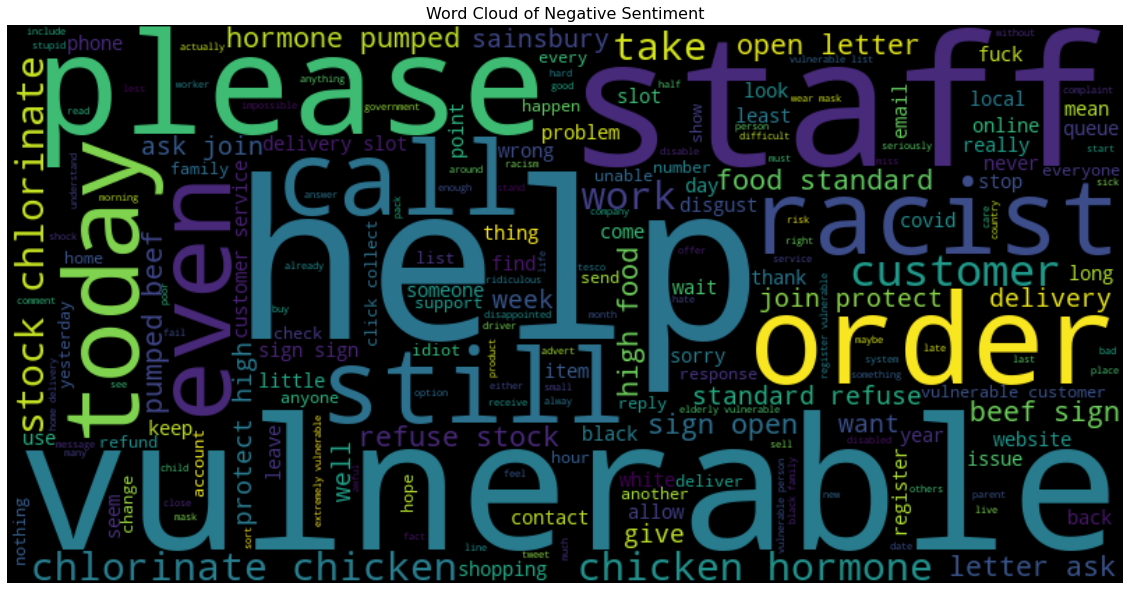

In [31]:
# get the negative word cloud map
exclude_words = ['sainsbury', 'people', 'think', 'make', 'go','need','time','supermarket','try','thank','know','tell','say','']  # 你想要剔除的单词列表

negative_texts = ' '.join(sain_df[sain_df['sentiment'] == 'negative']['pro_text'])

words = negative_texts.split()
words = [word for word in words if word.lower() not in exclude_words]

cleaned_negative_texts = ' '.join(words)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(cleaned_negative_texts)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiment', fontsize=16)
plt.axis('off')

plt.show()


# Trend and LDA Analysis

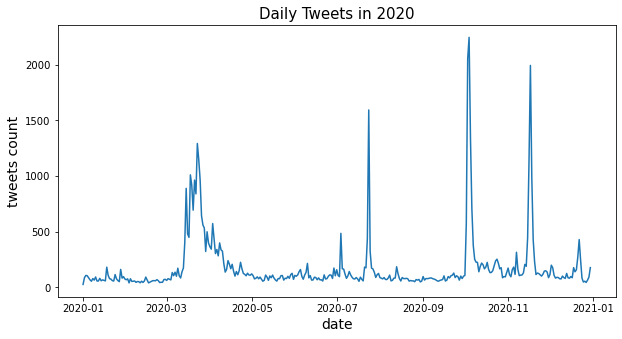

In [33]:
#Tweedts trend in 2020
plt.figure(figsize=[10,5])
plt.plot(sain_df.groupby(by=['date'])['id'].count())

plt.xlabel('date', fontsize=14)
plt.ylabel('tweets count', fontsize=14)
plt.title('Daily Tweets in 2020', fontsize=15)
 
plt.show()

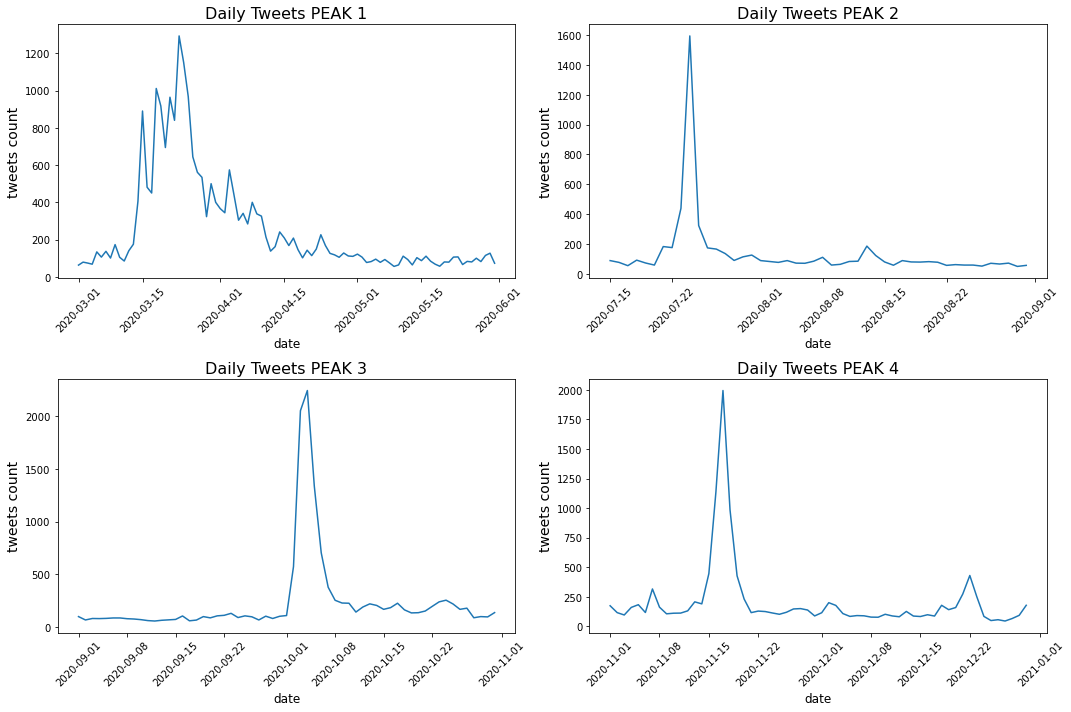

In [34]:
 # tweets trend in peak time
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# define peak time
date_ranges = [('2020-03-01', '2020-05-31', 'PEAK 1'),
               ('2020-07-15', '2020-08-31', 'PEAK 2'),
               ('2020-09-01', '2020-10-31', 'PEAK 3'),
               ('2020-11-01', '2020-12-31', 'PEAK 4')]

# subplot
for i, (start_date, end_date, title) in enumerate(date_ranges):
    filtered_df = sain_df[(sain_df['date'] >= start_date) & (sain_df['date'] <= end_date)]
    daily_counts = filtered_df.groupby(by=['date'])['id'].count()
    axs[i//2, i%2].plot(daily_counts)
    axs[i//2, i%2].set_title('Daily Tweets ' + title, fontsize=16)
    axs[i//2, i%2].set_xlabel('date', fontsize=12)
    axs[i//2, i%2].set_ylabel('tweets count', fontsize=14)
    axs[i // 2, i % 2].tick_params(axis='x', rotation=45)

plt.tight_layout()


plt.show()


In [35]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import fitz  # PyMuPDF

In [32]:
# word_tokenize
words = nltk.word_tokenize(" ".join(sain_df['pro_text']))

stop_words = set(stopwords.words('english'))

# removing stop words
words = [word for word in words if word not in stop_words]


In [57]:
#define peak time
peak1 = sain_df[(sain_df['date'] >= '2020-03-10') & (sain_df['date'] <= '2020-04-15')]['pro_text'].str.cat(sep=' ')
peak2 = sain_df[(sain_df['date'] >= '2020-07-20') & (sain_df['date'] <= '2020-08-01')]['pro_text'].str.cat(sep=' ')
peak3 = sain_df[(sain_df['date'] >= '2020-10-01') & (sain_df['date'] <= '2020-10-10')]['pro_text'].str.cat(sep=' ')
peak4 = sain_df[(sain_df['date'] >= '2020-11-10') & (sain_df['date'] <= '2020-11-22')]['pro_text'].str.cat(sep=' ')
peaks = [peak1, peak2, peak3, peak4]


# Preprocess the documents
texts = [[word for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words] for doc in peaks]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Apply LDA
num_topics = 3 # Adjust as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.024*"mask" + 0.020*"wear" + 0.015*"people" + 0.007*"staff" + 0.007*"customer" + 0.006*"go" + 0.006*"think" + 0.005*"make" + 0.005*"sainsbury" + 0.005*"like"
Topic: 1 
Words: 0.016*"delivery" + 0.014*"vulnerable" + 0.011*"people" + 0.011*"slot" + 0.009*"help" + 0.009*"need" + 0.009*"please" + 0.008*"time" + 0.007*"try" + 0.007*"staff"
Topic: 2 
Words: 0.017*"people" + 0.016*"racist" + 0.012*"black" + 0.011*"white" + 0.009*"advert" + 0.009*"like" + 0.008*"sainsbury" + 0.007*"think" + 0.007*"family" + 0.006*"make"


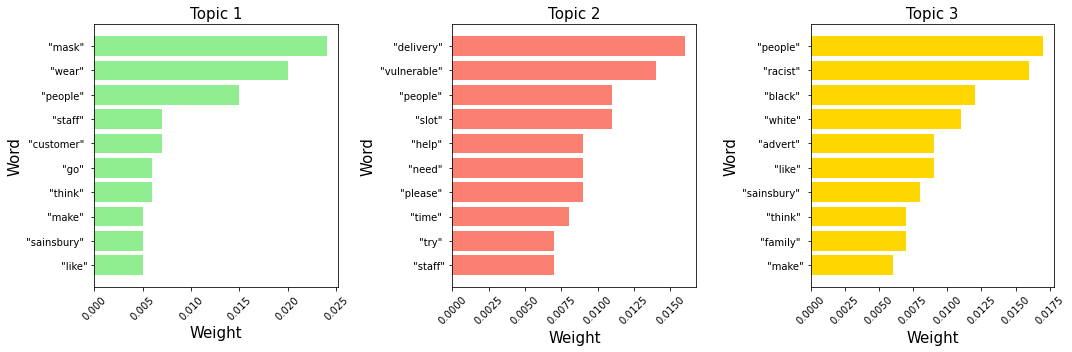

In [58]:
#  Extract topic words and their weights
topic_words = []
topic_weights = []
topic_colors = [ 'lightgreen', 'salmon', 'gold']  
for idx, topic in lda_model.print_topics(-1):
    words = topic.split('+')
    topic_words.append([word.split('*')[1] for word in words])
    weights = [float(word.split('*')[0]) for word in words]
    topic_weights.append(weights)

# Create a bar plot for each peak
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    for j, (word, weight) in enumerate(zip(topic_words[i], topic_weights[i])):
        plt.barh(word, weight, color=topic_colors[i])  # Assign color to each word based on its position in the topic
    plt.xlabel('Weight', fontsize=15)
    plt.ylabel('Word', fontsize=15)
    plt.title('Topic {}'.format(i+1), fontsize=15)
    plt.gca().invert_yaxis()  # Invert y-axis to display the most important words at the top
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

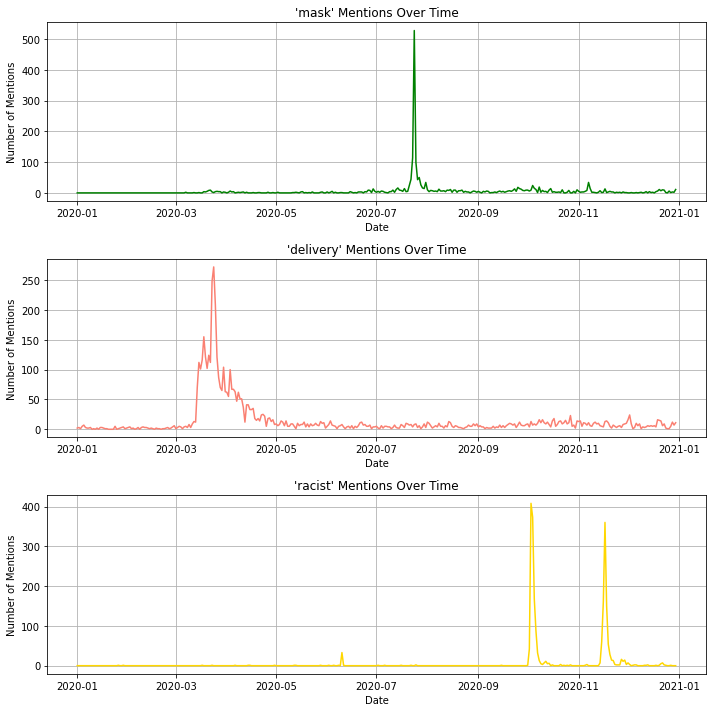

In [38]:
import matplotlib.pyplot as plt

# Use regular expressions to count the number of times the 'pro_text' column contains 'mask'
sain_df['mask_count'] = sain_df['pro_text'].str.count('mask')
sain_df['delivery_count'] = sain_df['pro_text'].str.count('delivery')
sain_df['racist_count'] = sain_df['pro_text'].str.count('racist')


# Convert the 'date' column to the datetime type
sain_df['date'] = pd.to_datetime(sain_df['date'])

# Group by date
mask_counts_by_date = sain_df.groupby('date')['mask_count'].sum()
delivery_counts_by_date = sain_df.groupby('date')['delivery_count'].sum()
racist_counts_by_date = sain_df.groupby('date')['racist_count'].sum()


# creat subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the number of mentions of 'mask'
axs[0].plot(mask_counts_by_date, color='green')
axs[0].set_title("'mask' Mentions Over Time")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Mentions')
# axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True)

# Plot the number of mentions of 'delivery' 
axs[1].plot(delivery_counts_by_date, color='salmon')
axs[1].set_title("'delivery' Mentions Over Time")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Mentions')
# axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

# Plot the number of mentions of 'racist' 
axs[2].plot(racist_counts_by_date, color='gold')
axs[2].set_title("'racist' Mentions Over Time")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Number of Mentions')
# axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(True)


plt.tight_layout()
plt.show()


# Example Analysis - Most popluar tweets

There are four indicators could be used for tweet popularity:
    'quote_count', 'reply_count', 'retweet_count', 'favorite_count'

In [39]:
popularity_df = sain_df[['date','id','full_text','pro_text','quote_count', 'reply_count', 'retweet_count', 'favorite_count','sentiment']]
popularity_df.head()

,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
9738,2020-01-01,1212495897394896897,@sainsburys order placed on 14 Dec was delayed...,order place delay subsequently lose transit le...,0,1,0,0,negative
64647,2020-01-01,1212332236458082305,@SaffronWatson_ @sainsburys I couldn’t find an...,find,0,1,0,0,neutral
79476,2020-01-01,1212428488608800774,So pleased that @sainsburys have started stock...,pleased start stock burrata king soft milky ch...,0,0,0,1,positive
61178,2020-01-01,1212511251118657536,@sainsburys It was marsh mills in plymouth pro...,marsh mill plymouth probably sunday go find ba...,0,1,0,0,negative
15750,2020-01-01,1212507819028692999,Loving the new label for the @sainsburys Taste...,love label taste difference fino colourful des...,0,0,2,11,positive


In [40]:
pd.set_option('display.max_colwidth', None)

In [41]:
popularity_df = popularity_df.sort_values(by=['favorite_count'],ascending=False)
popularity_df.head(50)

,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
4246,2020-10-04,1312720470106689540,"Dear @sainsburys — I will feel so much safer shopping in your stores now I know there’s no chance of bumping into Laurence Fox. Thank you. Yours, a loyal customer https://t.co/Y4OdFKrTew",dear feel much safe shopping know chance bumping laurence thank loyal customer,76,235,2664,31420,positive
30661,2020-12-21,1341086365526716422,dear @sainsburys if you are worried about running short of EU Broccoli and Cauliflower just pop over to Lincolnshire - we are ploughing it back in due to having too much of it.,dear worry run short broccoli cauliflower lincolnshire plough back much,228,354,3274,10818,positive
38807,2020-11-15,1328028799317970944,@sainsburys Sainsbury’s reading all the racist tantrums and Karen’s threatening to shop elsewhere: https://t.co/Hv2M6hrfYl,sainsbury read racist tantrum karen threaten elsewhere,74,41,847,9340,neutral
50451,2020-11-16,1328413307355754496,"@sainsburys People complaining they can’t “relate” to this advert as it doesn’t “represent” them, yet felt perfectly represented when these guys were on our TVs.... make it make sense 🤣 https://t.co/PRccEM62j8",people complain relate advert represent felt perfectly represent guy make make sense,120,55,910,8679,positive
28596,2020-11-15,1327952074303279104,@sainsburys All of you writing negative comments on this do realise you're just outing yourself at massive racists right? You're saying that the existence of a black family makes you *so* angry that you'd boycott shopping where you've shopped forever. Disgusting.,write negative comment realise massive racist right say existence black family make angry boycott shopping forever disgust,10,26,119,7603,negative
57921,2020-10-04,1312844948916535299,"The principal shareholders of @sainsburys, the Qatari government, may have a track record of migrant exploitation and human rights abuses.\n\nBut at least their supermarkets in the UK are committed to social justice activism on Twitter. ✊🎉\n\n#Priorities #LoveWins #IStandWithQatar https://t.co/U9wW1Y9PvJ",principal shareholder qatari government track record migrant exploitation human right abuse least supermarket commit social justice activism twitter priority lovewins istandwithqatar,47,105,780,4065,negative
4284,2020-11-17,1328755380072181760,I’ll definitely be shopping at @sainsburys knowing that racists will be shopping elsewhere 👏🏽\n\n#sainsburysXmas,definitely know racist elsewhere sainsburysxmas,46,52,243,3816,neutral
1100,2020-10-09,1314490865063284736,"Hey @Tesco, @asda, @LidlGB, @Sainsburys, @Waitrose, @IcelandFoods @MarksAndSpencer and @Morrisons. What you doing later? Fancy coming to our #Aldi30thBirthdayParty?",later fancy come aldithbirthdayparty,334,284,339,3811,neutral
39708,2020-10-09,1314543077588193286,@AldiUK @Tesco @asda @LidlGB @sainsburys @waitrose @IcelandFoods @marksandspencer @Morrisons What did @coopuk do at the last party? 🥴,last party,7,6,64,2374,neutral
41119,2020-04-05,1246720027681792000,What a disgrace @sainsburys 😤👎🏻👎🏻😡 https://t.co/CQFMw8MXj8,disgrace 😤👎🏻👎🏻😡,33,124,328,2300,neutral


In [42]:
# Filter text that contains "chlorinate|hormone"
mask_texts = popularity_df['pro_text'].str.contains('chlorinate|hormone', case=False)
mask_texts = mask_texts.fillna(False)
filtered_texts = popularity_df[ mask_texts]


filtered_texts.head()


,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
18077,2020-06-04,1268618131037016070,Will you label origin of food ?\nI don't want poisoned pork or chicken etc...\nI want to buy UK produce #chlorinatedchicken \n\n@coopuk @morrisons @tesco @sainsburys @LidlGB,label origin food want poison pork chicken want produce chlorinatedchicken,3,4,25,45,negative
56836,2020-06-06,1269233669987872769,"If would be smashing if @sainsburys @Tesco @Morrisons @asda @waitrose @coopuk can all commit to the public and trade negotiators that they won’t be stocking US meat products (chlorinated chicken, infested fish, hormone riddled beef) it might be a good message now.",would smash commit public trade negotiator stock meat product ( chlorinate chicken infested fish hormone riddle beef ) might good message,0,3,11,25,positive
50675,2020-07-04,1279549430786637825,I signed the open letter asking @Tesco @asda @sainsburys @Morrisons @LidlGB @coopuk and @AldiUK to join @waitrose &amp; protect the UK’s high food standards by refusing to stock chlorinated chicken or hormone-pumped beef. Will you sign too? 🐔🐮 https://t.co/aVw2R7Jyri,sign open letter ask join protect high food standard refuse stock chlorinate chicken hormone-pumped beef sign,0,1,14,16,negative
82125,2020-07-04,1279373437228716032,I signed the open letter asking @Tesco @asda @sainsburys @Morrisons @LidlGB @coopuk and @AldiUK to join @waitrose &amp; protect the UK’s high food standards by refusing to stock chlorinated chicken or hormone-pumped beef. Will you sign too? 🐔🐮 https://t.co/8HwrX4pgpB,sign open letter ask join protect high food standard refuse stock chlorinate chicken hormone-pumped beef sign,0,2,3,14,negative
16588,2020-07-13,1282756941517918208,"If @Tesco doesn't join the list to boycott chlorinated chicken on 1st January, I'll be boycotting Tesco and shop at @AldiUK, @coopuk and @sainsburys.",join list boycott chlorinate chicken january boycotting tesco,0,2,5,12,negative


In [43]:
# Filter text that contains "delivery|staff|slot"
mask_texts = popularity_df['pro_text'].str.contains('delivery|staff|slot', case=False)
mask_texts = mask_texts.fillna(False)
filtered_texts = popularity_df[ mask_texts]

filtered_texts.head()


,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
76754,2020-03-15,1239319371195060227,I wonder if @Tesco @sainsburys @waitrose &amp; others have a way they could possibly block say Tuesday &amp; Saturday delivery slots for those over 70’s or vulnerable categories only....? It’s currently impossible for my quarantined parents to get a slot for weeks!,wonder others could possibly block tuesday saturday delivery slot vulnerable category currently impossible quarantine parent slot week,14,76,146,1794,negative
4729,2020-04-24,1253740563012161539,"Outrageous @sainsburys to be rudely, angrily and loudly shamed by one of your staff for taking my two young children into my local store this evening to get food. As a single Mum, I have no option but to take them with me. Your colleague said I should have left them home alone.",outrageous rudely angrily loudly shamed staff take young child local evening food single option take colleague say left home alone,22,78,154,764,negative
32920,2020-10-02,1312036904561455104,"@sainsburys I thought you were just a grocery retailer who..\nserved customers regardless of ethnicity, race or religion.\nemployed staff, regardless of ethnicity, race or religion.\n&amp; treated everyone equally, regardless of ethnicity, race or religion.\nYou are creating division.",think grocery retailer serve customer regardless ethnicity race religion employ staff regardless ethnicity race religion treat everyone equally regardless ethnicity race religion create division,6,38,201,725,neutral
13791,2020-11-16,1328449854004224002,I was preparing for a quarter-mile walk in the rain down the pitch black towpath and over a bridge to collect a @sainsburys delivery after 9pm tonight. At 8.55pm the driver knocked on our boat with all our shopping on a trolley. Outstanding service! 👍🏻👍🏻👍🏻 https://t.co/GQ3KKYn6Z3,prepare quarter-mile walk rain pitch black towpath bridge collect delivery tonight driver knock boat shopping trolley outstanding service 👍🏻👍🏻👍🏻,3,43,10,531,positive
80094,2020-03-14,1238734359701659654,"Hey, @waitrose @tesco @sainsburys\n\nPoorer people and people living alone will need home food deliveries when self-isolating and I know you are taking your essential role seriously\n\nWould you consider suspending minimum order limit for free delivery during #coronavirus crisis?",poorer people people live alone need home food delivery self-isolating know take essential role seriously would consider suspend minimum order limit free delivery coronavirus crisis,7,20,158,464,positive


In [44]:
# Filter text that contains "racist|racism"
mask_texts = popularity_df['pro_text'].str.contains('racist|racism', case=False)
mask_texts = mask_texts.fillna(False)
filtered_texts = popularity_df[ mask_texts]

filtered_texts.head(10)


,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
38807,2020-11-15,1328028799317970944,@sainsburys Sainsbury’s reading all the racist tantrums and Karen’s threatening to shop elsewhere: https://t.co/Hv2M6hrfYl,sainsbury read racist tantrum karen threaten elsewhere,74,41,847,9340,neutral
28596,2020-11-15,1327952074303279104,@sainsburys All of you writing negative comments on this do realise you're just outing yourself at massive racists right? You're saying that the existence of a black family makes you *so* angry that you'd boycott shopping where you've shopped forever. Disgusting.,write negative comment realise massive racist right say existence black family make angry boycott shopping forever disgust,10,26,119,7603,negative
4284,2020-11-17,1328755380072181760,I’ll definitely be shopping at @sainsburys knowing that racists will be shopping elsewhere 👏🏽\n\n#sainsburysXmas,definitely know racist elsewhere sainsburysxmas,46,52,243,3816,neutral
73698,2020-10-02,1312058128016576512,"@LozzaFox @sainsburys @Argos_Online ""we provided our Black colleagues with a safe space to gather...\n\nwe are reviewing and publishing our ethnicity pay gap later this year.""\n\nWhy would black employees need a safe space? Why would they have an ethnicity pay gap? 🤨🤔\n\nAre they admitting to being a racist company?",provide black colleague safe space gather review publish ethnicity later year would black employee need safe space would ethnicity admit racist company,15,59,200,1384,positive
40912,2020-10-05,1313113587876012038,Just bought a trolly load from @sainsburys . It's not where I usually shop. They stood up to racist bullies. Showed there's some honour in the business world\nSo it's a big thank you.,buy trolly load usually stood racist bully show honour business world thank,287,1655,129,1102,negative
76942,2020-11-18,1328953582322929664,Me now walking into @sainsburys now that the racists have decided to shop elsewhere #sainsburysadvert #Sainsburys #SainsburysXmas https://t.co/nnGFcTI65D,walk racist decide elsewhere sainsburysadvert sainsburys sainsburysxmas,8,15,72,817,neutral
51546,2020-10-04,1312691116337225728,"@LozzaFox @sainsburys The actual opposite of what they tweeted. So scared of equality aren’t you, and so determine to promote racism, that you tweet this?",actual opposite tweet scared equality determine promote racism tweet,1,26,3,518,neutral
20153,2020-11-15,1327997279412908033,"@PaulSewter1 @sainsburys That’s one less racist I don’t have to be around when I’m shopping so thank you, on behalf of the non racist community you have done us a massive favour.",less racist around thank behalf racist community massive favour,0,0,0,363,negative
41528,2020-11-27,1332419387068997640,"We believe in a society built on mutual respect, and support @Channel4 @AldiUK @Asda @CoOpUK @IcelandFoods @LidlGB @MarksandSpencer @Sainsburys @Tesco &amp; @Waitrose in their stand against racism. #StandAgainstRacism #TogetherAgainstHate https://t.co/5ortGJ52cJ",believe society build mutual respect support stand racism standagainstracism togetheragainsthate,4,7,25,269,neutral
17661,2020-10-04,1312736372202115072,"Dear @sainsburys, I must commend you on a truly enjoyable shopping experience today. The lack of whiny entitled racist piss babies soiling themselves in the veg aisle was a vast improvement. Kudos. https://t.co/dkLDfBUSdG",dear must commend truly enjoyable shopping experience today lack whiny entitle racist piss baby soil aisle vast improvement kudos,2,0,15,257,positive


In [45]:
# Filter text that contains "sustainable|sustainability|plastic|waste|responsibility"
mask_texts = popularity_df['pro_text'].str.contains('sustainable|sustainability|plastic|waste|responsibility', case=False)
mask_texts = mask_texts.fillna(False)
filtered_texts = popularity_df[ mask_texts]


filtered_texts.head(10)


,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
10190,2020-10-19,1318334498900185088,"Plastic bags use to be 5p. Now 20/30p. Proceeds still go to good causes?Does government still earn millions in VAT from them?@sainsburys in fulham ran out of bags,made everyone buy £2 bags. A lady's own bag split, she couldnt afford £2 for a bag, management shrugged, walked away",plastic bag proceeds still good cause government still earn million fulham bag make everyone bag lady split couldnt afford management shrug walk away,0,20,14,170,positive
39021,2020-04-01,1245289320119926785,Did you know we import 60% of the food we eat in the UK? @Sainsburys @JudithBatchelar says that human health today depends on a resilient global food system #FTGlobalFood #sustainablefood https://t.co/1EQ287kxuv,know import food say human health today depend resilient global food system ftglobalfood sustainablefood,0,0,4,153,neutral
5081,2020-05-12,1260116674923167746,".@sainsburys starts trial of @Ecover #refill stations, a potential to save 1m tonnes of #plastic a year\n\nhttps://t.co/OmXbvJq0yf https://t.co/WWzDgvxCRc",start trial refill station potential save tonne plastic year,11,7,44,143,neutral
16861,2020-07-24,1286600441845948418,"My sister works for a national retail store. I know they are taking the same stance as @sainsburys and won't be challenging shoppers refusing to wear masks, or refusing entry to the store. \n\nSo basically noone is policing this. \n\nIt relies entirely on personal responsibility. 👍",sister work national retail know take stance challenge shopper refuse wear mask refuse entry basically noone police rely entirely personal responsibility,1,30,2,78,positive
26097,2020-10-22,1319205238801371138,"Hi @sainsburys - please see photo below. Our garden backs your car park - on 11/10/20 a car crashed into the fence (which is your responsibility). This is a security risk.We have chased the store (kenton,harrow) but they have made little effort to resolve. Please help ASAP https://t.co/O9sXfxsIQE",please photo garden back park crash fence ( responsibility ) security risk chase ( kenton harrow ) make little effort resolve please help asap,0,4,9,60,negative
80217,2020-03-04,1235181700864446466,"Why do supermarkets continue to charge less for 4/6 packs wrapped in plastic, than buying 4 or 6 individual tins? @sainsburys can’t you offer the same discount to customers preferring to use less plastic? #plasticwaste #ClimateEmergency https://t.co/hacNZIIdNJ",supermarket continue charge less pack wrap plastic buying individual tin offer discount customer prefer less plastic plasticwaste climateemergency,11,4,16,56,negative
6458,2020-01-31,1223182748103462913,@sainsburys You are still not doing enough. You still persist in offering cheaper buys if you buy a multi product wrapped in plastic but charge more if you buy the same number individually . Thinking of your croissants at the bakery counters .,still enough still persist offer cheap buy multi product wrap plastic charge number individually think croissant bakery counter,0,5,2,50,neutral
7905,2020-02-26,1232691970352521221,We've teamed up with @sainsburys to help reduce waste by trialing refills of Ecover laundry or washing up liquid in store. We'd love to roll this out to 20 more stores by the end of the year! Bring your empties to @sainsburys Harringay to refill &amp; join our #REFILLUTION https://t.co/9n0vl0vIXn,team help reduce waste trialing refill ecover laundry wash liquid love roll year bring empty harringay refill join refillution,2,5,15,50,positive
76134,2020-01-19,1218847345128955904,"I love grapes and because there are quite a lot of fruits I can’t eat following a low FODMAP diet, I eat a lot of grapes. PLEASE @Ocado and @sainsburys can you start packaging grapes in brown bags instead of large plastic punnets? Small steps but a change that’s good no? 🙏",love grape quite fruit follow fodmap diet grape please start package grape brown bag instead la

In [46]:
# Filter text that contains "mask"
mask_texts = popularity_df['pro_text'].str.contains('mask', case=False)
mask_texts = mask_texts.fillna(False)
filtered_texts = popularity_df[ mask_texts]


filtered_texts.head(10)


,date,id,full_text,pro_text,quote_count,reply_count,retweet_count,favorite_count,sentiment
3307,2020-07-23,1286279219610345472,@ImmuneSuper @sainsburys Im sorry but what reason is there to not wear a mask?,sorry reason wear mask,0,26,2,222,negative
33781,2020-07-25,1287075923288821761,I'm disappointed in some of the big supermarkets doing little to enforce mask wearing. Retailers protect their revenues by employing Store Detectives but won't invest in hiring people to enforce mask policy &amp; protect law abiding customers. \n@Tesco @sainsburys @asda @Morrisons,disappointed supermarket little enforce mask wear retailer protect revenue employ detective invest hire people enforce mask policy protect abide customer,5,26,45,193,negative
54090,2020-07-24,1286670911647690754,"@sainsburys Just been into a North London Sainsburys and followed 2 customers in who were not wearing masks. Asked security ""isn't everyone supposed to be wearing masks"" and his flaky response was, ""we can't enforce it"". Of course you can, refuse entry damnit, how hard is that! @sainsburys",north london sainsburys follow customer wear mask ask security everyone suppose wear mask flaky response enforce course refuse entry damnit hard,1,61,10,176,negative
80158,2020-10-04,1312710429379002370,Hi @sainsburys \nPlease remind security staff at London New Cross to wear masks properly.\nDoesn't work when worn on chin.,please remind security staff london cross wear mask properly work worn chin,0,5,27,155,positive
657,2020-07-23,1286351182164877313,"@sainsburys @Elizaebeth5 With this tweet you are advertising that you are putting profit over the safety of your staff, the communities you serve and the law of the land.\n\nIt literally wouldve been better to have said nothing. This is advertising to those who refuse to wear masks to come shop.",tweet advertising put profit safety staff community serve land literally wouldve well say nothing advertising refuse wear mask come,0,4,2,103,positive
57746,2020-07-23,1286429101352529921,"@sainsburys @ImmuneSuper Firstly, security guards at the door limiting access to those without masks (and offering free masks to those without). 2. Not serving those without masks at the checkout. 3. Reminders over the store intercom. Step up, protect your staff and customers.",firstly security guard door limit access without mask ( offer free mask without ) serve without mask checkout reminder intercom step protect staff customer,0,2,3,86,positive
50874,2020-07-16,1283841986848608257,Who knew in 2020 we'd all be on Twitter debating which supermarkets are least fascist 🤪 @Tesco @Morrisons @AldiUK @sainsburys \n#NoMask #KBF #covidhoax,knew twitter debate supermarket least fascist nomask covidhoax,0,8,13,83,negative
16861,2020-07-24,1286600441845948418,"My sister works for a national retail store. I know they are taking the same stance as @sainsburys and won't be challenging shoppers refusing to wear masks, or refusing entry to the store. \n\nSo basically noone is policing this. \n\nIt relies entirely on personal responsibility. 👍",sister work national retail know take stance challenge shopper refuse wear mask refuse entry basically noone police rely entirely personal responsibility,1,30,2,78,positive
23864,2020-09-25,1309384561315454977,@sainsburys Can you show me the scientific evidence that wearing a mask will stop the spread? Or are you going along with the draconian rules this Gov are forcing on us? PS this is what the WHO said about masks 👇👇 https://t.co/qoZp6OCdKf,show scientific evidence wear mask stop spread go along draconian rule force say mask,2,14,16,74,neutral
74778,2020-07-27,1287752537639182337,Not going back to @sainsburys. None of these fuckers had masks and staff did nothing. https://t.co/WgoWCPUm67,go back none fucker mask staff nothing,0,0,11,65,neutral
